# Graded Assignment 2
# Credit Card Customer Segmentation

For each question, there are clear instructions in each cell. Follow those instructions and write the code after each block of:

YOUR CODE HERE

Please use the exact variable name if it is specified in the comment.

We’ll run a Python test script against your program to test whether each function implementation is correct.

In [1]:
%%capture
###########################################################
### EXECUTE THIS CELL BEFORE YOU TO TEST YOUR SOLUTIONS ###
###########################################################
"""
Execute this cell to import all the libraries/functions you need for the entire exercise
"""

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

import imp
from nose.tools import assert_equal
from pandas.testing import assert_frame_equal, assert_series_equal
import numpy.testing as nt
sol = imp.load_compiled("sol", "./.sol.py")

### Part 1. Data Loading (20 pts)

In [2]:
"""
Q1 (5pts).

Load the Credit Card Dataset from data.csv into a pandas dataframe called df.

"""

df = pd.read_csv("data.csv")

df.head()


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_frame_equal(sol.df, df)

In [4]:
"""
Q2 (10pts).

- Analyze the summary statistics of the dataframe in Q1.

- Store the number of features with missing values in a variable called missing_feat

- Drop all samples that have missing values.

- Store the updated dataframe in a variable called df_clean
"""

# 📊 Summary statistics
summary_stats = df.describe()
print(summary_stats)


            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000

In [5]:
# ❓ Count features with missing values
missing_feat = df.isnull().sum().gt(0).sum()
print("Number of features with missing values:", missing_feat)

Number of features with missing values: 2


In [6]:
# 🧹 Drop rows with any missing values
df_clean = df.dropna()

In [7]:
# 🔍 Optional: Check if any missing values remain
print("Missing values after cleaning:\n", df_clean.isnull().sum())

Missing values after cleaning:
 CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


In [8]:
df_clean.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


In [9]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_equal(sol.missing_feat, missing_feat)

In [10]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_frame_equal(sol.df_clean, df_clean)

In [11]:
"""
Q3 (5pts).

- Store the data without customer identification as a numpy array into a variable called X. (Note: do not modify df_clean itself).
  
"""

# Drop the 'CUST_ID' column, but do NOT modify df_clean itself
X = df_clean.drop("CUST_ID", axis=1).values



In [12]:
##########################
### TEST YOUR SOLUTION ###
##########################

nt.assert_equal(sol.X, X)

### Part 2. Data Preprocessing (10 pts)

In [13]:
"""
Q4 (10pts).

- Apply MinMax Feature Scaling to all of the features in the loaded dataset.

- Store the scaled data in variables X_scaled.

Hint: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

"""

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the feature matrix
X_scaled = scaler.fit_transform(X)



In [14]:
print(X_scaled)

[[2.14779454e-03 8.18182000e-01 1.94536779e-03 ... 1.82564563e-03
  0.00000000e+00 1.00000000e+00]
 [1.68169097e-01 9.09091000e-01 0.00000000e+00 ... 1.40344791e-02
  2.22222000e-01 1.00000000e+00]
 [1.31026136e-01 1.00000000e+00 1.57662475e-02 ... 8.20961806e-03
  0.00000000e+00 1.00000000e+00]
 ...
 [1.22871936e-03 8.33333000e-01 2.94456089e-03 ... 1.07843629e-03
  2.50000000e-01 0.00000000e+00]
 [7.06688341e-04 8.33333000e-01 0.00000000e+00 ... 7.29475795e-04
  2.50000000e-01 0.00000000e+00]
 [1.95717777e-02 6.66667000e-01 2.22932216e-02 ... 1.15527021e-03
  0.00000000e+00 0.00000000e+00]]


In [15]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_equal(type(sol.scaler), type(scaler))

In [16]:
##########################
### TEST YOUR SOLUTION ###
##########################

nt.assert_equal(sol.X_scaled, X_scaled)

### Part 3. Model Training and Evaluation (70 pts)

In [17]:
"""
Q5 (20 pts).

- Train K-Means Clustering Models with a random_state =  0 and n_init = 'auto' for k values: 7, 9, 11, 13, 15

- Store the trained clustering models for each k setting in a list called all_models.

- Store the inertia for each k setting in a list called all_inertia.

Hint: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

This cell may take about a minute to complete.
"""

# Define list of k values
k_values = [7, 9, 11, 13, 15]

# Initialize storage lists
all_models = []
all_inertia = []

# Loop through k values, train models, and store results
for k in k_values:
    model = KMeans(n_clusters=k, random_state=0, n_init=10)
    model.fit(X_scaled)
    all_models.append(model)
    all_inertia.append(model.inertia_)
    
    


In [18]:
##########################
### TEST YOUR SOLUTION ###
##########################
nt.assert_almost_equal(sol.all_inertia, all_inertia,5)

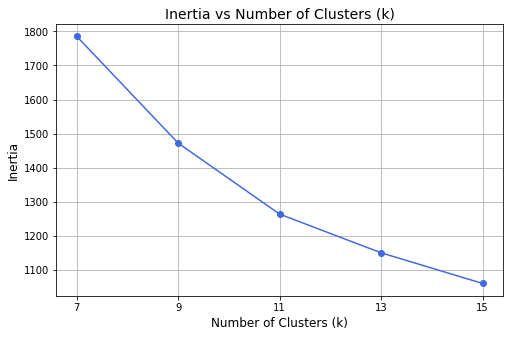

In [19]:
"""
Q6 (10 pts).

- Plot the inertia values calculated in Q5 with respect to the number of clusters.

- Label the x-axis and y-axis accordingly

NOTE: 
- Your plot cannot be autograded.  
- If you go to the guide, there will be a PDF with the solution plot.
- Please check it and if your answer matches, set the variable q6_plot_check = 'yes' .
"""

q6_plot_check = 'yes' # change to yes after you verify your plot


# Plot inertia vs k
plt.figure(figsize=(8, 5))
plt.plot(k_values, all_inertia, marker='o', linestyle='-', color='royalblue')
plt.title('Inertia vs Number of Clusters (k)', fontsize=14)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia', fontsize=12)
plt.grid(True)
plt.xticks(k_values)




###########################
### DO NOT MODIFY THIS! ###
plt.show()
###########################

In [20]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_equal('yes', q6_plot_check)

In [21]:
"""
Q7 (10 pts).

- Observe the plot in Q6, based on the elbow method, which k value would be the most optimal choice?

- Store the most optimal k values as an integer into a variable called best_k

- Store the kmeans model corresponding to the best_k selected in a variable called best_kmeans.
"""

# Best number of clusters (elbow point)
best_k = 11

# Get the corresponding trained model from all_models
# (Index in k_values: [7, 9, 11, 13, 15] => 11 is at index 2)
best_kmeans = all_models[k_values.index(best_k)]



In [22]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_equal(sol.best_k, best_k)

In [23]:
"""
Q8 (10 pts).

- Using the best_kmeans model, fetch the clustering labels for all of the samples 
  in the dataset and store the array in a variable called labels.

- Make a copy of the df_clean dataframe and store it in a new variable called df_clustered

- Add the clustering labels to the dataframe df_clustered as a new column called 'Cluster'.

"""

# 🎯 Get predicted cluster labels
labels = best_kmeans.labels_

# 🧬 Copy the cleaned dataframe
df_clustered = df_clean.copy()

# ➕ Add the 'Cluster' column
df_clustered['Cluster'] = labels

df_clustered.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,7
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12,2
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12,10


In [24]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_frame_equal(sol.df_clustered, df_clustered)

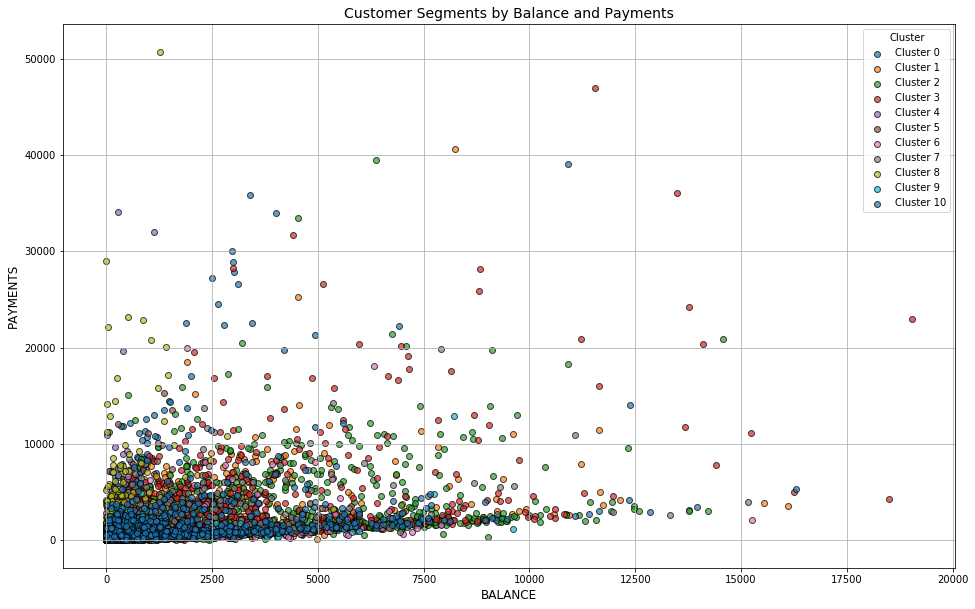

In [25]:
"""
Q9 (10 pts).

- Create a scatter plot with the unnormalized BALANCE as the x values 
  and PAYMENTS as the y values

- Assign points with labels based on their cluster labels

- Label the x-axis and y-axis accordingly.

- Display the legend.

NOTE: 
- Your plot cannot be autograded.  
- If you go to the guide, there will be a PDF with the solution plot.
- Please check it and if your answer matches, set the variable q9_plot_check = 'yes' .

"""
q9_plot_check = 'yes' # change to yes after you verify your plot

from matplotlib.patches import Patch

# 🎨 Create color map (up to 11 clusters)
colors = plt.cm.tab10.colors  # or use plt.cm.get_cmap('tab10', n_clusters)

# 🎯 Get unique clusters
unique_clusters = sorted(df_clustered['Cluster'].unique())

# 🖼️ Plot points
plt.figure(figsize=(16, 10))
for cluster_id in unique_clusters:
    cluster_data = df_clustered[df_clustered['Cluster'] == cluster_id]
    plt.scatter(
        cluster_data['BALANCE'],
        cluster_data['PAYMENTS'],
        color=colors[cluster_id % len(colors)],
        label=f"Cluster {cluster_id}",
        alpha=0.7,
        edgecolor='k'
    )

# 🏷️ Labels and legend
plt.xlabel("BALANCE", fontsize=12)
plt.ylabel("PAYMENTS", fontsize=12)
plt.title("Customer Segments by Balance and Payments", fontsize=14)
plt.legend(title="Cluster")
plt.grid(True)



###########################
### DO NOT MODIFY THIS! ###
plt.show()
###########################

In [26]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_equal('yes', q9_plot_check)

In [27]:
"""
Q10 (10 pts).

- Observe the plot in Q9 and provide an analysis of the potential customer profile for Cluster 0.

- How would you describe their overall BALANCE: 'low', 'average', 'high'. 
  Store the answer as a string in the variable balance.

- How would you describe their overall PAYMENTS: 'low, 'average', 'high'. 
  Store the answer as a string in the variable payments.

- Consider what this implies in terms of customer behavior (0pts)

"""

balance = 'low'
payments = 'average'



In [28]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_equal(sol.balance, balance)

In [29]:
##########################
### TEST YOUR SOLUTION ###
##########################

assert_equal(sol.payments, payments)